<a href="https://colab.research.google.com/github/Kevin29Johnson/Data_Cleaning_Code_for_BigDataProject/blob/main/cleanbda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLEANING AND PRE-PROCESSING OF PRODUCT DATA**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from google.colab import files
   
uploaded = files.upload()

Saving bigbasket_products.csv to bigbasket_products.csv


**BASIC DATA EXPLORATION**

checking the shape , info and summary of the dataset 

In [3]:
df=pd.read_csv('bigbasket_products.csv')
df.head(4)

,Unnamed: 0,product,category,sub_category,brand,sale_price,market_price,image_url,p_url,type,eancode,rating,description
0,0,Original Disinfectant Toilet Cleaner Liquid,Cleaning & Household,All Purpose Cleaners,Harpic,489.00,534.0,https://www.bigbasket.com/media/uploads/p/s/12...,https://www.bigbasket.com/pd/1207190/harpic-or...,Toilet Cleaners,Invalid Code,4.2,Harpic All in One is the one-stop shop for all...
1,1,Disinfectant Surface & Floor Cleaner Liquid - ...,Cleaning & Household,All Purpose Cleaners,Lizol,302.00,380.0,https://www.bigbasket.com/media/uploads/p/s/24...,https://www.bigbasket.com/pd/249154/lizol-disi...,Floor & Other Cleaners,8901396115113,4.2,Lizol is India's No.1 Household Cleaning Brand...
2,2,Surface Disinfectant Spray,Cleaning & Household,All Purpose Cleaners,Savlon,256.76,318.0,https://www.bigbasket.com/media/uploads/p/s/12...,https://www.bigbasket.com/pd/1212019/savlon-su...,Disinfectant Spray & Cleaners,Invalid Code,4.4,A wide variety of high traffic surfaces such a...
3,3,Harpic Disinfectant Toilet Cleaner Original200...,Cleaning & Household,All Purpose Cleaners,bb Combo,74.48,76.0,https://www.bigbasket.com/media/uploads/p/s/12...,https://www.bigbasket.com/pd/1204983/bb-combo-...,Toilet Cleaners,Invalid Code,NaN,Harpic All in One is the one stop shop for all...


In [4]:
df.columns

Index(['Unnamed: 0', 'product', 'category', 'sub_category', 'brand',
       'sale_price', 'market_price', 'image_url', 'p_url', 'type', 'eancode',
       'rating', 'description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   image_url     27555 non-null  object 
 8   p_url         27555 non-null  object 
 9   type          27555 non-null  object 
 10  eancode       26991 non-null  object 
 11  rating        18892 non-null  float64
 12  description   27440 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 2.7+ MB


**CHECKING FOR NULL VALUES**

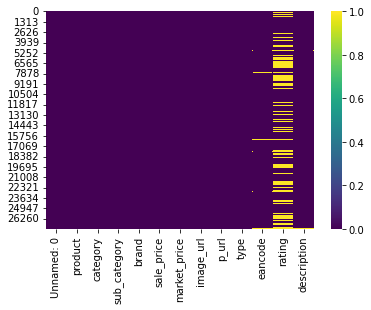

In [6]:
sns.heatmap(df.isnull(),cmap='viridis')

**CHECKING THE DISTRIBUTION OF RATINGS COLUMNS**

Text(0.5, 0, 'Ratings')

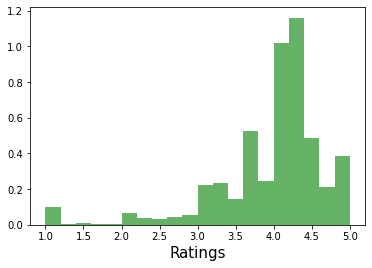

In [7]:

plt.hist(df.rating,density=1,bins=20,alpha=0.6,color='green') # plotting histogram 
plt.xlabel('Ratings',fontsize=15)



In [8]:

df.isnull().sum() / df.shape[0] * 100.00

Unnamed: 0       0.000000
product          0.003629
category         0.000000
sub_category     0.000000
brand            0.003629
sale_price       0.000000
market_price     0.000000
image_url        0.000000
p_url            0.000000
type             0.000000
eancode          2.046815
rating          31.438940
description      0.417347
dtype: float64

**IMPUTING MISSING VALUES OF RATING COLUMNS WITH MEDIAN VALUES**

In [9]:
df1=df.copy()
df1.rating.fillna(df1.rating.median(),inplace=True)


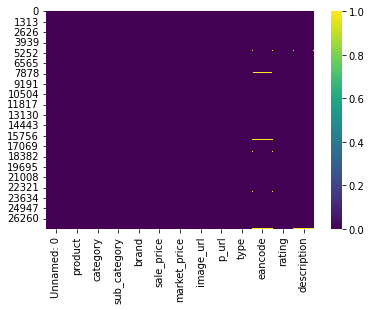

In [10]:
sns.heatmap(df1.isnull(),cmap='viridis')

In [11]:
df1.head(3)

,Unnamed: 0,product,category,sub_category,brand,sale_price,market_price,image_url,p_url,type,eancode,rating,description
0,0,Original Disinfectant Toilet Cleaner Liquid,Cleaning & Household,All Purpose Cleaners,Harpic,489.00,534.0,https://www.bigbasket.com/media/uploads/p/s/12...,https://www.bigbasket.com/pd/1207190/harpic-or...,Toilet Cleaners,Invalid Code,4.2,Harpic All in One is the one-stop shop for all...
1,1,Disinfectant Surface & Floor Cleaner Liquid - ...,Cleaning & Household,All Purpose Cleaners,Lizol,302.00,380.0,https://www.bigbasket.com/media/uploads/p/s/24...,https://www.bigbasket.com/pd/249154/lizol-disi...,Floor & Other Cleaners,8901396115113,4.2,Lizol is India's No.1 Household Cleaning Brand...
2,2,Surface Disinfectant Spray,Cleaning & Household,All Purpose Cleaners,Savlon,256.76,318.0,https://www.bigbasket.com/media/uploads/p/s/12...,https://www.bigbasket.com/pd/1212019/savlon-su...,Disinfectant Spray & Cleaners,Invalid Code,4.4,A wide variety of high traffic surfaces such a...


In [12]:
df1.columns

Index(['Unnamed: 0', 'product', 'category', 'sub_category', 'brand',
       'sale_price', 'market_price', 'image_url', 'p_url', 'type', 'eancode',
       'rating', 'description'],
      dtype='object')

**REMOVING UNWANTED COLUMNS**

In [13]:
df1.drop(['image_url', 'p_url', 'eancode','description'], axis = 1, inplace = True)

In [14]:
df1.head(3)

,Unnamed: 0,product,category,sub_category,brand,sale_price,market_price,type,rating
0,0,Original Disinfectant Toilet Cleaner Liquid,Cleaning & Household,All Purpose Cleaners,Harpic,489.00,534.0,Toilet Cleaners,4.2
1,1,Disinfectant Surface & Floor Cleaner Liquid - ...,Cleaning & Household,All Purpose Cleaners,Lizol,302.00,380.0,Floor & Other Cleaners,4.2
2,2,Surface Disinfectant Spray,Cleaning & Household,All Purpose Cleaners,Savlon,256.76,318.0,Disinfectant Spray & Cleaners,4.4


In [15]:
del df1['Unnamed: 0']
df1.head(2)

,product,category,sub_category,brand,sale_price,market_price,type,rating
0,Original Disinfectant Toilet Cleaner Liquid,Cleaning & Household,All Purpose Cleaners,Harpic,489.0,534.0,Toilet Cleaners,4.2
1,Disinfectant Surface & Floor Cleaner Liquid - ...,Cleaning & Household,All Purpose Cleaners,Lizol,302.0,380.0,Floor & Other Cleaners,4.2


**CHECKING FOR DUPLICATES AND REMOVING THEM**

In [16]:
df1[df1.duplicated()]

,product,category,sub_category,brand,sale_price,market_price,type,rating
438,Multi-Surface Cleaner and Deodorizer - Sparkli...,Cleaning & Household,All Purpose Cleaners,Pine Sol,300.0,300.0,Imported Cleaners,5.0
2100,Neem Tulsi Tea Tree Body Scrub,Beauty & Hygiene,Bath & Hand Wash,Kama Ayurveda,1495.0,1495.0,Body Scrubs & Exfoliants,4.1
2101,Lavender Try Me Personal Care Gift Set,Beauty & Hygiene,Bath & Hand Wash,Soulflower,850.0,1000.0,Bathing Bars & Soaps,5.0
2102,Scrubber - Braided Back,Beauty & Hygiene,Bath & Hand Wash,Bare Essentials,157.5,175.0,Bathing Accessories,4.6
2103,Brush & Pumice - Foot (with Handle),Beauty & Hygiene,Bath & Hand Wash,Bare Essentials,135.0,150.0,Bathing Accessories,4.0
...,...,...,...,...,...,...,...,...
24125,Baby Fork Set - Orchid,"Kitchen, Garden & Pets",Crockery & Cutlery,Montavo,185.0,185.0,"Cutlery, Spoon & Fork",3.0
24126,Pure Melamine Small Tray - Peruvian Lily,"Kitchen, Garden & Pets",Crockery & Cutlery,Servewell,195.0,195.0,Plates & Bowls,4.1
24127,Coffee-Tea-Milk Mug - Navy White Hearts Print,"Kitchen, Garden & Pets",Crockery & Cutlery,Rslee,349.0,349.0,"Cups, Mugs & Tumblers",4.1
25043,Fields of Gold - Organic Little Millet,"Foodgrains, Oil & Masala",Dals & Pulses,PRISTINE,90.0,90.0,Cereals & Millets,3.5


In [17]:
df1[df1.duplicated()].shape

(362, 8)

In [18]:
df1.shape

(27555, 8)

In [19]:
df2=df1.copy()

In [20]:
df2.head(2)

,product,category,sub_category,brand,sale_price,market_price,type,rating
0,Original Disinfectant Toilet Cleaner Liquid,Cleaning & Household,All Purpose Cleaners,Harpic,489.0,534.0,Toilet Cleaners,4.2
1,Disinfectant Surface & Floor Cleaner Liquid - ...,Cleaning & Household,All Purpose Cleaners,Lizol,302.0,380.0,Floor & Other Cleaners,4.2


In [21]:
df2[df2.duplicated()]

,product,category,sub_category,brand,sale_price,market_price,type,rating
438,Multi-Surface Cleaner and Deodorizer - Sparkli...,Cleaning & Household,All Purpose Cleaners,Pine Sol,300.0,300.0,Imported Cleaners,5.0
2100,Neem Tulsi Tea Tree Body Scrub,Beauty & Hygiene,Bath & Hand Wash,Kama Ayurveda,1495.0,1495.0,Body Scrubs & Exfoliants,4.1
2101,Lavender Try Me Personal Care Gift Set,Beauty & Hygiene,Bath & Hand Wash,Soulflower,850.0,1000.0,Bathing Bars & Soaps,5.0
2102,Scrubber - Braided Back,Beauty & Hygiene,Bath & Hand Wash,Bare Essentials,157.5,175.0,Bathing Accessories,4.6
2103,Brush & Pumice - Foot (with Handle),Beauty & Hygiene,Bath & Hand Wash,Bare Essentials,135.0,150.0,Bathing Accessories,4.0
...,...,...,...,...,...,...,...,...
24125,Baby Fork Set - Orchid,"Kitchen, Garden & Pets",Crockery & Cutlery,Montavo,185.0,185.0,"Cutlery, Spoon & Fork",3.0
24126,Pure Melamine Small Tray - Peruvian Lily,"Kitchen, Garden & Pets",Crockery & Cutlery,Servewell,195.0,195.0,Plates & Bowls,4.1
24127,Coffee-Tea-Milk Mug - Navy White Hearts Print,"Kitchen, Garden & Pets",Crockery & Cutlery,Rslee,349.0,349.0,"Cups, Mugs & Tumblers",4.1
25043,Fields of Gold - Organic Little Millet,"Foodgrains, Oil & Masala",Dals & Pulses,PRISTINE,90.0,90.0,Cereals & Millets,3.5


In [22]:
df1.drop_duplicates(keep=False,inplace=True)

In [23]:
df1[df1.duplicated()]

,product,category,sub_category,brand,sale_price,market_price,type,rating


In [24]:
df1.shape#after removal of duplicates

(26832, 8)

In [25]:
df2.shape#original

(27555, 8)

In [26]:
df1.head(4)

,product,category,sub_category,brand,sale_price,market_price,type,rating
0,Original Disinfectant Toilet Cleaner Liquid,Cleaning & Household,All Purpose Cleaners,Harpic,489.00,534.0,Toilet Cleaners,4.2
1,Disinfectant Surface & Floor Cleaner Liquid - ...,Cleaning & Household,All Purpose Cleaners,Lizol,302.00,380.0,Floor & Other Cleaners,4.2
2,Surface Disinfectant Spray,Cleaning & Household,All Purpose Cleaners,Savlon,256.76,318.0,Disinfectant Spray & Cleaners,4.4
3,Harpic Disinfectant Toilet Cleaner Original200...,Cleaning & Household,All Purpose Cleaners,bb Combo,74.48,76.0,Toilet Cleaners,4.1


In [27]:
df1['Profit']=df1['market_price']-df1['sale_price']
df1.head(4)

,product,category,sub_category,brand,sale_price,market_price,type,rating,Profit
0,Original Disinfectant Toilet Cleaner Liquid,Cleaning & Household,All Purpose Cleaners,Harpic,489.00,534.0,Toilet Cleaners,4.2,45.00
1,Disinfectant Surface & Floor Cleaner Liquid - ...,Cleaning & Household,All Purpose Cleaners,Lizol,302.00,380.0,Floor & Other Cleaners,4.2,78.00
2,Surface Disinfectant Spray,Cleaning & Household,All Purpose Cleaners,Savlon,256.76,318.0,Disinfectant Spray & Cleaners,4.4,61.24
3,Harpic Disinfectant Toilet Cleaner Original200...,Cleaning & Household,All Purpose Cleaners,bb Combo,74.48,76.0,Toilet Cleaners,4.1,1.52


In [28]:
df1.head(3)

,product,category,sub_category,brand,sale_price,market_price,type,rating,Profit
0,Original Disinfectant Toilet Cleaner Liquid,Cleaning & Household,All Purpose Cleaners,Harpic,489.00,534.0,Toilet Cleaners,4.2,45.00
1,Disinfectant Surface & Floor Cleaner Liquid - ...,Cleaning & Household,All Purpose Cleaners,Lizol,302.00,380.0,Floor & Other Cleaners,4.2,78.00
2,Surface Disinfectant Spray,Cleaning & Household,All Purpose Cleaners,Savlon,256.76,318.0,Disinfectant Spray & Cleaners,4.4,61.24


In [29]:
df1['Profit(%)']=round((df1['Profit']/df1['sale_price'])*100,1)
df1.head(2)

,product,category,sub_category,brand,sale_price,market_price,type,rating,Profit,Profit(%)
0,Original Disinfectant Toilet Cleaner Liquid,Cleaning & Household,All Purpose Cleaners,Harpic,489.0,534.0,Toilet Cleaners,4.2,45.0,9.2
1,Disinfectant Surface & Floor Cleaner Liquid - ...,Cleaning & Household,All Purpose Cleaners,Lizol,302.0,380.0,Floor & Other Cleaners,4.2,78.0,25.8


In [30]:
df1.isnull().sum()

product         1
category        0
sub_category    0
brand           1
sale_price      0
market_price    0
type            0
rating          0
Profit          0
Profit(%)       0
dtype: int64

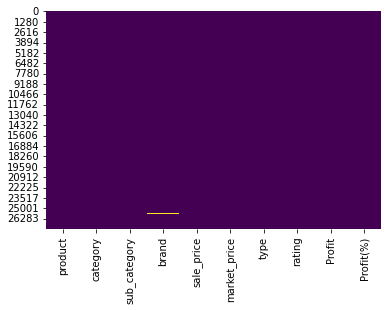

In [31]:
sns.heatmap(df1.isnull(),cbar=False,cmap='viridis')

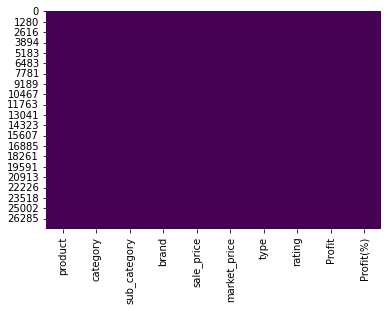

In [32]:
df2=df1.copy()
df1.dropna(inplace=True)
sns.heatmap(df1.isnull(),cbar=False,cmap='viridis')

In [33]:
df1.head(2)

,product,category,sub_category,brand,sale_price,market_price,type,rating,Profit,Profit(%)
0,Original Disinfectant Toilet Cleaner Liquid,Cleaning & Household,All Purpose Cleaners,Harpic,489.0,534.0,Toilet Cleaners,4.2,45.0,9.2
1,Disinfectant Surface & Floor Cleaner Liquid - ...,Cleaning & Household,All Purpose Cleaners,Lizol,302.0,380.0,Floor & Other Cleaners,4.2,78.0,25.8


**EXPORTING THE FINAL DATASET**

In [34]:
df1.to_csv('new.csv', header=["product", "category", "sub_category","brand","sale_price","market_price","type","rating","Profit","Profitpercenatge"], index=False)
files.download('new.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>